<a href="https://colab.research.google.com/github/PGaea/ButardoPrincessGaea_BSIS2/blob/main/Activity3(Titanic_Dataset).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [67]:
df = pd.read_csv('https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv')

In [68]:

#view the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [70]:
# check for duplicate
df.duplicated().sum()

0

In [71]:
# correct data types
df.dtypes

,0
PassengerId,int64
Survived,int64
Pclass,int64
Name,object
Sex,object
Age,float64
SibSp,int64
Parch,int64
Ticket,object
Fare,float64


In [72]:
# convert categorial data
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

In [73]:
df['Sex'].head()

,Sex
0,0
1,1
2,1
3,1
4,0


In [74]:

# missing values
print(df.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [75]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype  
--------------  -----  
714 non-null    float64
dtypes: float64(1)
memory usage: 7.1 KB


In [76]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')

In [77]:
df['Age'] = df['Age'].round().astype('Int64')

In [78]:
df['Age'].head()

,Age
0,22
1,38
2,26
3,35
4,35


In [79]:
df['Age'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 891 entries, 0 to 890
Series name: Age
Non-Null Count  Dtype
--------------  -----
714 non-null    Int64
dtypes: Int64(1)
memory usage: 8.0 KB


In [80]:

# remove outliers
df = df[(df['Age'] >= 0) & (df['Age'] <= 100)]

In [81]:
df['Age'].head()

,Age
0,22
1,38
2,26
3,35
4,35


In [82]:

# create new features (FamilySize)
df['FamilySize'] = df['SibSp'] + df['Parch']

<ipython-input-82-2cbe1dd91c83>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['FamilySize'] = df['SibSp'] + df['Parch']


In [83]:
df['FamilySize'].head()

,FamilySize
0,1
1,1
2,0
3,1
4,0


In [84]:
# one-hot encoding - convert embarked
df = pd.get_dummies(df, columns=['Embarked'], prefix='Embarked')

In [85]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,FamilySize,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22,1,0,A/5 21171,7.2500,NaN,1,False,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38,1,0,PC 17599,71.2833,C85,1,True,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26,0,0,STON/O2. 3101282,7.9250,NaN,0,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35,1,0,113803,53.1000,C123,1,False,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35,0,0,373450,8.0500,NaN,0,False,False,True


In [86]:
# summary statistics
print(df[['Age', 'Fare']].describe())

             Age        Fare
count      714.0  714.000000
mean   29.693277   34.694514
std    14.524527   52.918930
min          0.0    0.000000
25%         20.0    8.050000
50%         28.0   15.741700
75%         38.0   33.375000
max         80.0  512.329200


Text(0.5, 1.0, 'Survival Rate by Pclass')

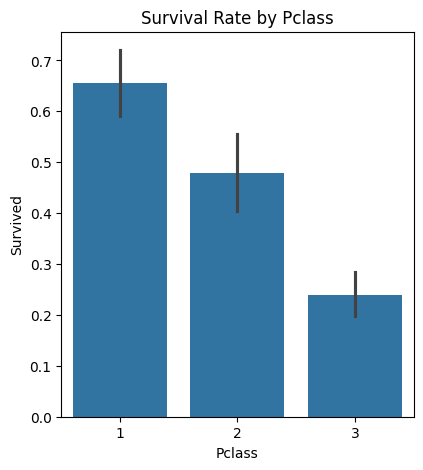

In [87]:

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.barplot(x='Pclass', y='Survived', data =df)
plt.title('Survival Rate by Pclass')

Text(0.5, 1.0, 'Survival Rate by Sex')

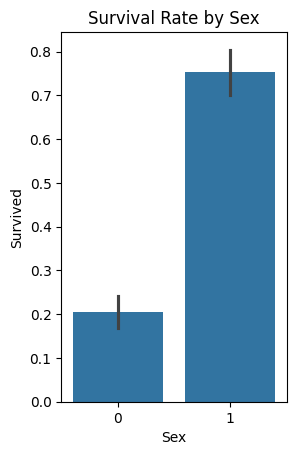

In [88]:

plt.subplot(1, 2, 2)
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Sex')